<a href="https://colab.research.google.com/github/DaisyXinyiHe/diabetes_mellitus_predict/blob/main/DataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Found Feature Importance and Correlation btwn Features

## Execute if using Google Colab

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Navigate to data folder

In [3]:
%cd /content/drive/MyDrive/Colab Notebooks/WiDS_2021

/content/drive/MyDrive/Colab Notebooks/WiDS_2021


## Load Library & Dataset

In [4]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np

In [4]:
training_data = pd.read_csv('training_data_clean.csv')

In [5]:
training_data = training_data.fillna(0)

## Define dependent variable

In [6]:
# Define independent and dependent variables
y = training_data['diabetes_mellitus']
training_data = training_data.drop(columns=['diabetes_mellitus'])
# hospital_id should not be invluded as predictors
training_data = training_data.drop(columns=['hospital_id'])
print(y.shape)
print(training_data.shape)

(130091,)
(130091, 346)


## Explore Dataset

In [7]:
training_data.iloc[:,1:]

,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,...,h1_potassium_min_0_1,h1_sodium_max_0_1,h1_sodium_min_0_1,h1_wbc_max_0_1,h1_wbc_min_0_1,d1_arterial_pco2_max_0_1,d1_arterial_pco2_min_0_1,d1_arterial_ph_max_0_1,d1_arterial_ph_min_0_1,d1_arterial_po2_max_0_1,d1_arterial_po2_min_0_1,d1_pao2fio2ratio_max_0_1,d1_pao2fio2ratio_min_0_1,h1_arterial_pco2_max_0_1,h1_arterial_pco2_min_0_1,h1_arterial_ph_max_0_1,h1_arterial_ph_min_0_1,h1_arterial_po2_max_0_1,h1_arterial_po2_min_0_1,h1_pao2fio2ratio_max_0_1,h1_pao2fio2ratio_min_0_1,ethnicity_African American,ethnicity_Asian,ethnicity_Caucasian,ethnicity_Hispanic,ethnicity_Native American,ethnicity_Other/Unknown,gender_F,gender_M,icu_stay_type_admit,icu_stay_type_readmit,icu_stay_type_transfer,icu_type_CCU-CTICU,icu_type_CSICU,icu_type_CTICU,icu_type_Cardiac ICU,icu_type_MICU,icu_type_Med-Surg ICU,icu_type_Neuro ICU,icu_type_SICU
0,68.0,22.732803,0,180.3,92,0.541667,0,73.9,2.3,113.0,502.01,0,0,0.4,31.0,2.51,0.0,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0,40.0,0.0,0.0,0.0,0.000,36.0,134.0,39.3,0.0000,0,14.1,46.0,32.0,68.0,37.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0
1,77.0,27.421875,0,160.0,90,0.927778,0,70.2,0.0,108.0,203.01,0,0,0.0,9.0,0.56,1.0,1.0,3.0,0.0,1.0,145.0,120.0,36.9,0,46.0,37.0,37.0,51.0,7.450,33.0,145.0,35.1,0.0000,1,12.7,0.0,0.0,95.0,31.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,25.0,31.952749,0,172.7,93,0.000694,0,95.3,0.0,122.0,703.03,0,0,0.0,0.0,0.00,0.0,3.0,6.0,0.0,5.0,0.0,102.0,0.0,0,68.0,0.0,0.0,0.0,0.000,37.0,0.0,36.7,0.0000,0,0.0,0.0,0.0,88.0,48.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,81.0,22.635548,1,165.1,92,0.000694,0,61.7,0.0,203.0,1206.03,1,0,0.0,0.0,0.00,0.6,4.0,6.0,0.0,5.0,185.0,114.0,25.9,1,60.0,30.0,30.0,142.0,7.390,4.0,0.0,34.8,0.0000,1,8.0,62.0,30.0,48.0,42.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
4,19.0,0.000000,0,188.0,91,0.073611,0,0.0,0.0,119.0,601.01,0,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,60.0,0.0,0,103.0,0.0,0.0,0.0,0.000,16.0,0.0,36.7,0.0000,0,0.0,0.0,0.0,99.0,57.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130086,50.0,29.287256,0,175.3,1109,0.023611,0,90.0,0.0,110.0,104.01,0,0,0.0,0.0,0.00,0.0,4.0,6.0,0.0,5.0,0.0,106.0,0.0,0,120.0,0.0,0.0,0.0,0.000,50.0,0.0,36.2,1751.1552,0,0.0,0.0,0.0,102.0,82.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0
130087,79.0,29.653433,0,162.6,1106,0.009722,0,78.4,3.5,105.0,207.01,0,0,0.7,32.0,1.07,0.0,4.0,6.0,0.0,4.0,139.0,112.0,39.0,0,125.0,0.0,0.0,0.0,0.000,42.0,140.0,36.4,5724.7776,0,9.5,0.0,0.0,97.0,63.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0
130088,73.0,32.265371,0,177.8,1104

In [8]:
# How many people are diagnosed with diabete in our dataset?
from collections import Counter
print(Counter(y))


Counter({0: 101945, 1: 28146})


We have more diagnosed patients than undiagnosed patients. 

In [ ]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(training_data, y, test_size = 0.2, random_state = 42)

# Fitting a general logistics regression without checking correlation

In [ ]:
print(X_train.shape)
print(y_train.shape)

(104072, 346)
(104072,)


In [ ]:
from sklearn.linear_model import LogisticRegression
# log reg at sklearn is default to have a regulatory factor "l2"
logreg = LogisticRegression()
logreg.fit(X_train.iloc[:,1:], y_train)
trainresult_logreg = logreg.predict(X_train.iloc[:,1:])
pred_logreg = logreg.predict(X_test.iloc[:,1:])



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
logreg_result = {'encounter_id': X_test.iloc[:,0], 'Result': pred_logreg}
logreg_result = pd.DataFrame(logreg_result)
print(logreg_result)

        encounter_id  Result
64153         200103       0
120206        190128       0
77218         260478       0
127944        247324       0
16400         278814       0
...              ...     ...
76866         253490       0
109335        168257       0
35413         225273       0
50303         185526       0
66667         217199       1

[26019 rows x 2 columns]


In [ ]:
# Evaluating Logistic Regression
from sklearn.metrics import confusion_matrix, accuracy_score,f1_score,precision_score,recall_score
print(f'Training Accuracy = {accuracy_score(y_train, trainresult_logreg )}')
print(f'Testing Accuracy = {accuracy_score(y_test, pred_logreg)}')
print(f'F1 = {f1_score(y_test, pred_logreg,average = None)}')
print(f'Precision = {precision_score(y_test,pred_logreg,average=None)}')
print(f'Recall = {recall_score(y_test, pred_logreg,average = None)}')
# Display the confusion matrix
print('Confusion matrix =')
print(confusion_matrix(y_test,pred_logreg))

Training Accuracy = 0.808574832808056
Testing Accuracy = 0.8069487682078481
F1 = [0.88579159 0.37656696]
Precision = [0.82664234 0.61792261]
Recall = [0.95405789 0.27079614]
Confusion matrix =
[[19479   938]
 [ 4085  1517]]


# Logistics regression correlation ranking

In [ ]:
# Check each feature's importance by checking their coefficiences
logreg_coef = logreg.coef_[0]
feature_num = list(range(0,len(logreg_coef)))
feature_name = list(X_train.columns)
feature_name = feature_name[1:]
feature_coef = pd.DataFrame({'num': feature_num, 'name':feature_name,'coef' : abs(logreg_coef)})
print(feature_coef.sort_values(by='coef', ascending = False))

     num                name          coef
7      7              weight  1.110633e-02
98    98      d1_glucose_max  1.068035e-02
52    52         d1_spo2_max  9.087395e-03
42    42    d1_heartrate_max  7.082040e-03
0      0                 age  6.804518e-03
..   ...                 ...           ...
306  306   h1_sodium_max_0_1  1.114722e-06
287  287  h1_calcium_min_0_1  5.452201e-07
286  286  h1_calcium_max_0_1  5.452201e-07
22    22   heart_rate_apache  4.364078e-07
6      6  readmission_status  0.000000e+00

[345 rows x 3 columns]


In [ ]:
feature_numbers = X_train.iloc[:,1:].shape[1]

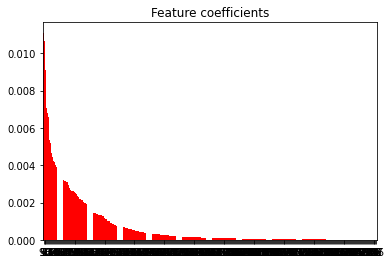

In [ ]:
# Plot the impurity-based feature importances of the forest
import matplotlib.pyplot as plt
indices = np.argsort(feature_coef.coef)[::-1]
plt.figure()
plt.title("Feature coefficients")
plt.bar(range(feature_numbers), feature_coef.coef[indices],
        color="r",  align="center")
plt.xticks(range(feature_numbers), indices)
plt.xlim([-1, feature_numbers])
plt.show()

It is very hard to see which feature is good because there are too many features! Maybe we don't need this much features. 

Limit the features to having correlation over 0.003

     num                       name      coef
0      0                        age  0.006805
1      1                        bmi  0.005210
3      3                     height  0.006583
7      7                     weight  0.011106
30    30            resprate_apache  0.003577
35    35                 wbc_apache  0.003180
36    36     d1_diasbp_invasive_max  0.004417
38    38              d1_diasbp_max  0.003686
42    42           d1_heartrate_max  0.007082
51    51            d1_resprate_min  0.004251
52    52                d1_spo2_max  0.009087
53    53                d1_spo2_min  0.003639
60    60                d1_temp_max  0.003604
61    61                d1_temp_min  0.003185
64    64              h1_diasbp_max  0.003135
65    65              h1_diasbp_min  0.003897
67    67  h1_diasbp_noninvasive_min  0.003405
77    77            h1_resprate_min  0.003117
80    80      h1_sysbp_invasive_max  0.003075
93    93                 d1_bun_min  0.004176
98    98             d1_glucose_ma

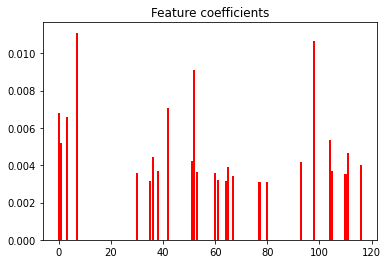

In [ ]:
# Extract the indices corresponding to a coefficient > 0.003
print(feature_coef[feature_coef.coef >= 0.003])

indices = feature_coef.coef[feature_coef.coef >= 0.003].index
plt.figure()
plt.title("Feature coefficients")
plt.bar( indices, feature_coef.coef[indices], color="r",  align="center")

plt.show()

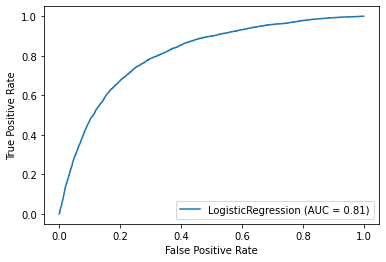

In [ ]:
# ROC Curve
from sklearn.metrics import roc_curve,plot_roc_curve
plot_roc_curve(logreg, X_test.iloc[:,1:], y_test)  
plt.show() 


# Fitting a general random forest without checking correlation

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# random forest classification default: n = 100, criterion='gini'(gini index for feature importance),max_depth = None
RF = RandomForestClassifier( random_state=42)
RF.fit(X_train.iloc[:,1:], y_train)
trainresult_RF = RF.predict(X_train.iloc[:,1:])
pred_RF = RF.predict(X_test.iloc[:,1:])

In [ ]:
RF_result = {'encounter_id': X_test.iloc[:,0], 'Result': pred_RF}
RF_result = pd.DataFrame(RF_result)
print(RF_result)

        encounter_id  Result
64153         200103       0
120206        190128       0
77218         260478       0
127944        247324       0
16400         278814       0
...              ...     ...
76866         253490       0
109335        168257       0
35413         225273       0
50303         185526       0
66667         217199       1

[26019 rows x 2 columns]


In [ ]:
# Evaluating Logistic Regression
from sklearn.metrics import confusion_matrix, accuracy_score,f1_score,precision_score,recall_score
print(f'Training Accuracy = {accuracy_score(y_train, trainresult_RF)}')
print(f'Testing Accuracy = {accuracy_score(y_test, pred_RF)}')
print(f'F1 = {f1_score(y_test, pred_RF,average = None)}')
print(f'Precision = {precision_score(y_test,pred_RF,average=None)}')
print(f'Recall = {recall_score(y_test, pred_RF,average = None)}')
# Display the confusion matrix
print('Confusion matrix =')
print(confusion_matrix(y_test,pred_RF))

Training Accuracy = 0.9999903912675839
Testing Accuracy = 0.8176717014489412
F1 = [0.89166476 0.42483026]
Precision = [0.83528002 0.66213152]
Recall = [0.95621296 0.31274545]
Confusion matrix =
[[19523   894]
 [ 3850  1752]]


Results from the sample random forest and the logistic regression is very similar

# Random Forest Feature Importance

In [ ]:
RF_feaimp = RF.feature_importances_
feature_num = list(range(0,len(RF_feaimp)))
feature_name = list(X_train.columns)
feature_name = feature_name[1:]
feature_imp = pd.DataFrame({'num': feature_num, 'name':feature_name,'imp' : abs(RF_feaimp)})
print(feature_imp.sort_values(by='imp', ascending = False))

     num                name       imp
98    98      d1_glucose_max  0.072258
21    21      glucose_apache  0.052380
128  128      h1_glucose_max  0.025062
129  129      h1_glucose_min  0.020724
1      1                 bmi  0.018248
..   ...                 ...       ...
219  219    d1_sysbp_min_0_1  0.000015
209  209      d1_mbp_min_0_1  0.000014
164  164                aids  0.000014
218  218    d1_sysbp_max_0_1  0.000013
6      6  readmission_status  0.000000

[345 rows x 3 columns]


In [ ]:
feature_numbers = X_train.iloc[:,1:].shape[1]

<BarContainer object of 345 artists>

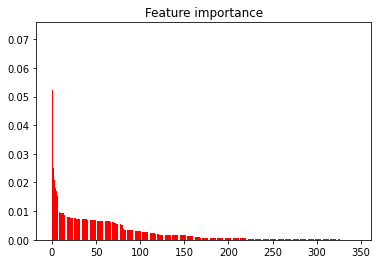

In [ ]:
# Plot the impurity-based feature importances of the forest

indices_RF = np.argsort(RF.feature_importances_)[::-1]
plt.figure()
plt.title("Feature importance")
plt.bar(range(feature_numbers), RF.feature_importances_[indices_RF],
        color="r",  align="center")
# plt.xticks(range(X_train.shape[1]), indices)
# plt.xlim([-1, X_train.shape[1]])
# plt.show()

It is very hard to see which feature is good because there are too many features! Maybe we don't need this much features. 

Limit the features to having correlation over 0.01.

     num               name       imp
0      0                age  0.011494
1      1                bmi  0.018248
7      7             weight  0.015333
21    21     glucose_apache  0.052380
97    97  d1_creatinine_min  0.010628
98    98     d1_glucose_max  0.072258
99    99     d1_glucose_min  0.016968
128  128     h1_glucose_max  0.025062
129  129     h1_glucose_min  0.020724


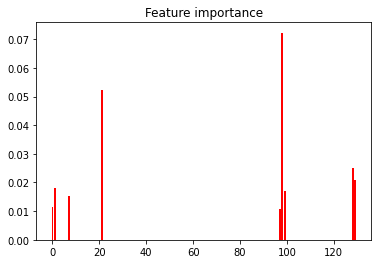

In [ ]:
# Extract the indices corresponding to a coefficient > 0.003
print(feature_imp [feature_imp.imp >= 0.01])

indices = feature_imp.imp[feature_imp.imp >= 0.01].index
plt.figure()
plt.title("Feature importance")
plt.bar( indices, feature_imp.imp[indices], color="r",  align="center")

plt.show()

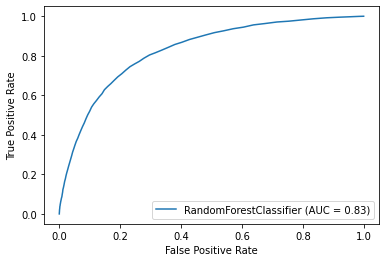

In [ ]:
plot_roc_curve(RF, X_test.iloc[:,1:], y_test)  
plt.show() 

# Load cleaned unlabled data and predict 

In [ ]:
unlabeled_data = pd.read_csv('unlabeled_data_clean.csv')

In [ ]:
unlabeled_data= unlabeled_data.drop(columns = 'hospital_id')

In [ ]:
unlabeled_data['encounter_id'].shape

(10229,)

In [ ]:
unl = np.array(unlabeled_data['encounter_id'])

In [ ]:
unl

array([144740, 141990, 142038, ..., 137126, 135652, 136852])

# Load solution template

In [ ]:
solution = pd.read_csv('SolutionTemplateWiDS2021.csv')

In [ ]:
solution.shape

(10234, 2)

In [ ]:
sol = np.array(solution['encounter_id'])

In [ ]:
sol

array([135000, 135001, 135002, ..., 145998, 145999, 146000])

In [ ]:
missing = np.isin(sol,unl, invert = True)
missing = sol[missing]
missing

array([138394, 140846, 143227, 143258, 144375])

Some solution data is not in the unlabeled data...are they in the training data?

In [ ]:
training_data[training_data['encounter_id'].isin(missing)]

,encounter_id,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,...,h1_potassium_min_0_1,h1_sodium_max_0_1,h1_sodium_min_0_1,h1_wbc_max_0_1,h1_wbc_min_0_1,d1_arterial_pco2_max_0_1,d1_arterial_pco2_min_0_1,d1_arterial_ph_max_0_1,d1_arterial_ph_min_0_1,d1_arterial_po2_max_0_1,d1_arterial_po2_min_0_1,d1_pao2fio2ratio_max_0_1,d1_pao2fio2ratio_min_0_1,h1_arterial_pco2_max_0_1,h1_arterial_pco2_min_0_1,h1_arterial_ph_max_0_1,h1_arterial_ph_min_0_1,h1_arterial_po2_max_0_1,h1_arterial_po2_min_0_1,h1_pao2fio2ratio_max_0_1,h1_pao2fio2ratio_min_0_1,ethnicity_African American,ethnicity_Asian,ethnicity_Caucasian,ethnicity_Hispanic,ethnicity_Native American,ethnicity_Other/Unknown,gender_F,gender_M,icu_stay_type_admit,icu_stay_type_readmit,icu_stay_type_transfer,icu_type_CCU-CTICU,icu_type_CSICU,icu_type_CTICU,icu_type_Cardiac ICU,icu_type_MICU,icu_type_Med-Surg ICU,icu_type_Neuro ICU,icu_type_SICU


These data is not in any dataset...let's remove them!

In [ ]:
for m in range(0,len(missing)):
  solution = solution.drop(solution[solution.encounter_id == missing[m]].index)

In [ ]:
solution.shape

(10229, 2)

# Sort ID by value in both solution and unlabeled to make sure that they are the same

In [ ]:
solution = solution.sort_values(by = 'encounter_id')

In [ ]:
unlabeled_data=unlabeled_data.sort_values(by = 'encounter_id')

# Use simple random forest to predict these unlabeled data

In [ ]:
pred_unlabel_RF = RF.predict(unlabeled_data.iloc[:,1:])
pred_prob_unlabel_RF = RF.predict_proba(unlabeled_data.iloc[:,1:])

In [ ]:
solution.diabetes_mellitus =pred_prob_unlabel_RF

In [ ]:
solution.head(10)

,encounter_id,diabetes_mellitus
0,135000,0.82
1,135001,0.99
2,135002,0.93
3,135003,0.56
4,135004,0.97
5,135005,0.76
6,135006,0.44
7,135007,0.74
8,135008,0.69
9,135009,0.93


# Add missing encounter_id back and they cannot be 'NAN' (because Kaggle said so. SMH!!!!!!!!!!!!!)

In [ ]:
missing = missing.reshape((len(missing),))
missingvalue = np.empty((len(missing),))
missingvalue[:] = 0

In [ ]:

missing_pd = {'encounter_id':missing, 'diabetes_mellitus':missingvalue}
missing_pd = pd.DataFrame(missing_pd)
missing_pd

,encounter_id,diabetes_mellitus
0,138394,0.0
1,140846,0.0
2,143227,0.0
3,143258,0.0
4,144375,0.0


In [ ]:
solution = solution.append(missing_pd)

In [ ]:
# Save results
solution.to_csv('solution.csv',index=False)

# Try Data Set 2

In [392]:
training_data_2 = pd.read_csv('training_data_clean_2.csv')

Take out ids

In [393]:
patientid = training_data_2.iloc[:,1]
training_data_2 = training_data_2.drop(columns=['hospital_id', 'encounter_id', 'icu_id', 'Unnamed: 0'])

Check correlations between variables

In [394]:
corr_matrix = training_data_2.corr()
print(corr_matrix)

                            age       bmi  ...  icu_type_Neuro ICU  icu_type_SICU
age                    1.000000  0.002124  ...           -0.021473      -0.011343
bmi                    0.002124  1.000000  ...           -0.013876      -0.003955
elective_surgery       0.068532  0.019309  ...            0.032798       0.108879
height                 0.000501  0.306554  ...           -0.002070       0.019056
pre_icu_los_days       0.044227  0.007397  ...           -0.029025       0.029274
...                         ...       ...  ...                 ...            ...
icu_type_Cardiac ICU   0.004651  0.007186  ...           -0.077345      -0.067843
icu_type_MICU         -0.002650  0.012838  ...           -0.089920      -0.078872
icu_type_Med-Surg ICU -0.032792 -0.010021  ...           -0.327416      -0.287189
icu_type_Neuro ICU    -0.021473 -0.013876  ...            1.000000      -0.077236
icu_type_SICU         -0.011343 -0.003955  ...           -0.077236       1.000000

[190 rows x 190

In [395]:
# Any correlation greater than 0.5 is considered large correlation
corr_greater_05 = corr_matrix[(abs(corr_matrix)> 0.5)]
corr_greater_05 = corr_greater_05[(abs(corr_greater_05)< 1)]

corr_greater_05[corr_greater_05.columns[~corr_greater_05.isnull().all()]]

,bmi,elective_surgery,weight,albumin_apache,apache_3j_diagnosis,apache_post_operative,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,...,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,cirrhosis,hepatic_failure,ethnicity_African American,ethnicity_Caucasian,icu_stay_type_admit,icu_stay_type_transfer
age,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bmi,NaN,NaN,0.872063,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
elective_surgery,NaN,NaN,NaN,NaN,0.780027,0.909581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500832,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
height,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pre_icu_los_days,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
icu_type_Cardiac ICU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
icu_type_MICU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [228]:
corr_greater_05.to_csv('corr_greater_05_2.csv',index=True)

In [396]:
training_data_2['readmission_status']

0         0
1         0
2         0
3         0
4         0
         ..
130086    0
130087    0
130088    0
130089    0
130090    0
Name: readmission_status, Length: 130091, dtype: int64

Drop readmission_status because it is all 0

In [397]:
training_data_2 = training_data_2.drop(columns='readmission_status')

Any of the 'h1*' and 'd1*' data are correlated with apache data. We can drop them. 

In [398]:
training_data_2 = training_data_2[training_data_2.columns.drop(list(training_data_2.filter(regex='h1')))]
training_data_2 = training_data_2[training_data_2.columns.drop(list(training_data_2.filter(regex='d1')))]

'weight' and 'bmi' are correlated. we can drop weight. 

In [399]:
training_data_2 = training_data_2.drop(columns='weight')

'icu_stay_type_admit' and 'icu_stay_type_transfer' are highly correlated. We can just drop one of them because they both don't seem to be highly correlated with patient having diabetes or not. 

In [400]:
training_data_2 = training_data_2.drop(columns='icu_stay_type_transfer')

'elective_surgery' and 'apache_post_operative' are highly correlated with several variables. Drop them. 

In [401]:
training_data_2 = training_data_2.drop(columns=['elective_surgery', 'apache_post_operative'])

In [402]:
training_data_2

,age,bmi,height,pre_icu_los_days,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus,ethnicity_African American,ethnicity_Asian,ethnicity_Caucasian,ethnicity_Hispanic,ethnicity_Native American,ethnicity_Other/Unknown,gender_F,gender_M,icu_stay_type_admit,icu_stay_type_readmit,icu_type_CCU-CTICU,icu_type_CSICU,icu_type_CTICU,icu_type_Cardiac ICU,icu_type_MICU,icu_type_Med-Surg ICU,icu_type_Neuro ICU,icu_type_SICU
0,68.0,22.732803,180.3,0.541667,2.3,113.0,502.01,0,0.4,31.0,2.51,0.0,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0,40.0,0.0,0.0,0.0,0.000,36.0,134.0,39.3,0.0000,0,14.1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0
1,77.0,27.421875,160.0,0.927778,0.0,108.0,203.01,0,0.0,9.0,0.56,1.0,1.0,3.0,0.0,1.0,145.0,120.0,36.9,0,46.0,37.0,37.0,51.0,7.450,33.0,145.0,35.1,0.0000,1,12.7,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0
2,25.0,31.952749,172.7,0.000694,0.0,122.0,703.03,0,0.0,0.0,0.00,0.0,3.0,6.0,0.0,5.0,0.0,102.0,0.0,0,68.0,0.0,0.0,0.0,0.000,37.0,0.0,36.7,0.0000,0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0
3,81.0,22.635548,165.1,0.000694,0.0,203.0,1206.03,0,0.0,0.0,0.00,0.6,4.0,6.0,0.0,5.0,185.0,114.0,25.9,1,60.0,30.0,30.0,142.0,7.390,4.0,0.0,34.8,0.0000,1,8.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0
4,19.0,0.000000,188.0,0.073611,0.0,119.0,601.01,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,60.0,0.0,0,103.0,0.0,0.0,0.0,0.000,16.0,0.0,36.7,0.0000,0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130086,50.0,29.287256,175.3,0.023611,0.0,110.0,104.01,0,0.0,0.0,0.00,0.0,4.0,6.0,0.0,5.0,0.0,106.0,0.0,0,120.0,0.0,0.0,0.0,0.000,50.0,0.0,36.2,1751.1552,0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0
130087,79.0,29.653433,162.6,0.009722,3.5,105.0,207.01,0,0.7,32.0,1.07,0.0,4.0,6.0,0.0,4.0,139.0,112.0,39.0,0,125.0,0.0,0.0,0.0,0.000,42.0,140.0,36.4,5724.7776,0,9.5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0
130088,73.0,32.265371,177.8,0.143056,0.0,114.0,102.01,0,0.0,30.0,2.43,1.0,1.0,1.0,0.0,1.0,346.0,104.0,0.0,1,58.0,44.0,44.0,80.0,7.224,34.0,142.0,32.9,358.9920,1,0.0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0
130089,81.0,24.408579,185.4,0.188194,0.0,124.0,306.01,0,0.0,0.0,0.00,0.0,4.0,6.0,0.0,5.0,137.0,83.0,32.0,0,60.0,0.0,0.0,0.0,0.000,31.0,0.0,35.5,2171.6640,0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

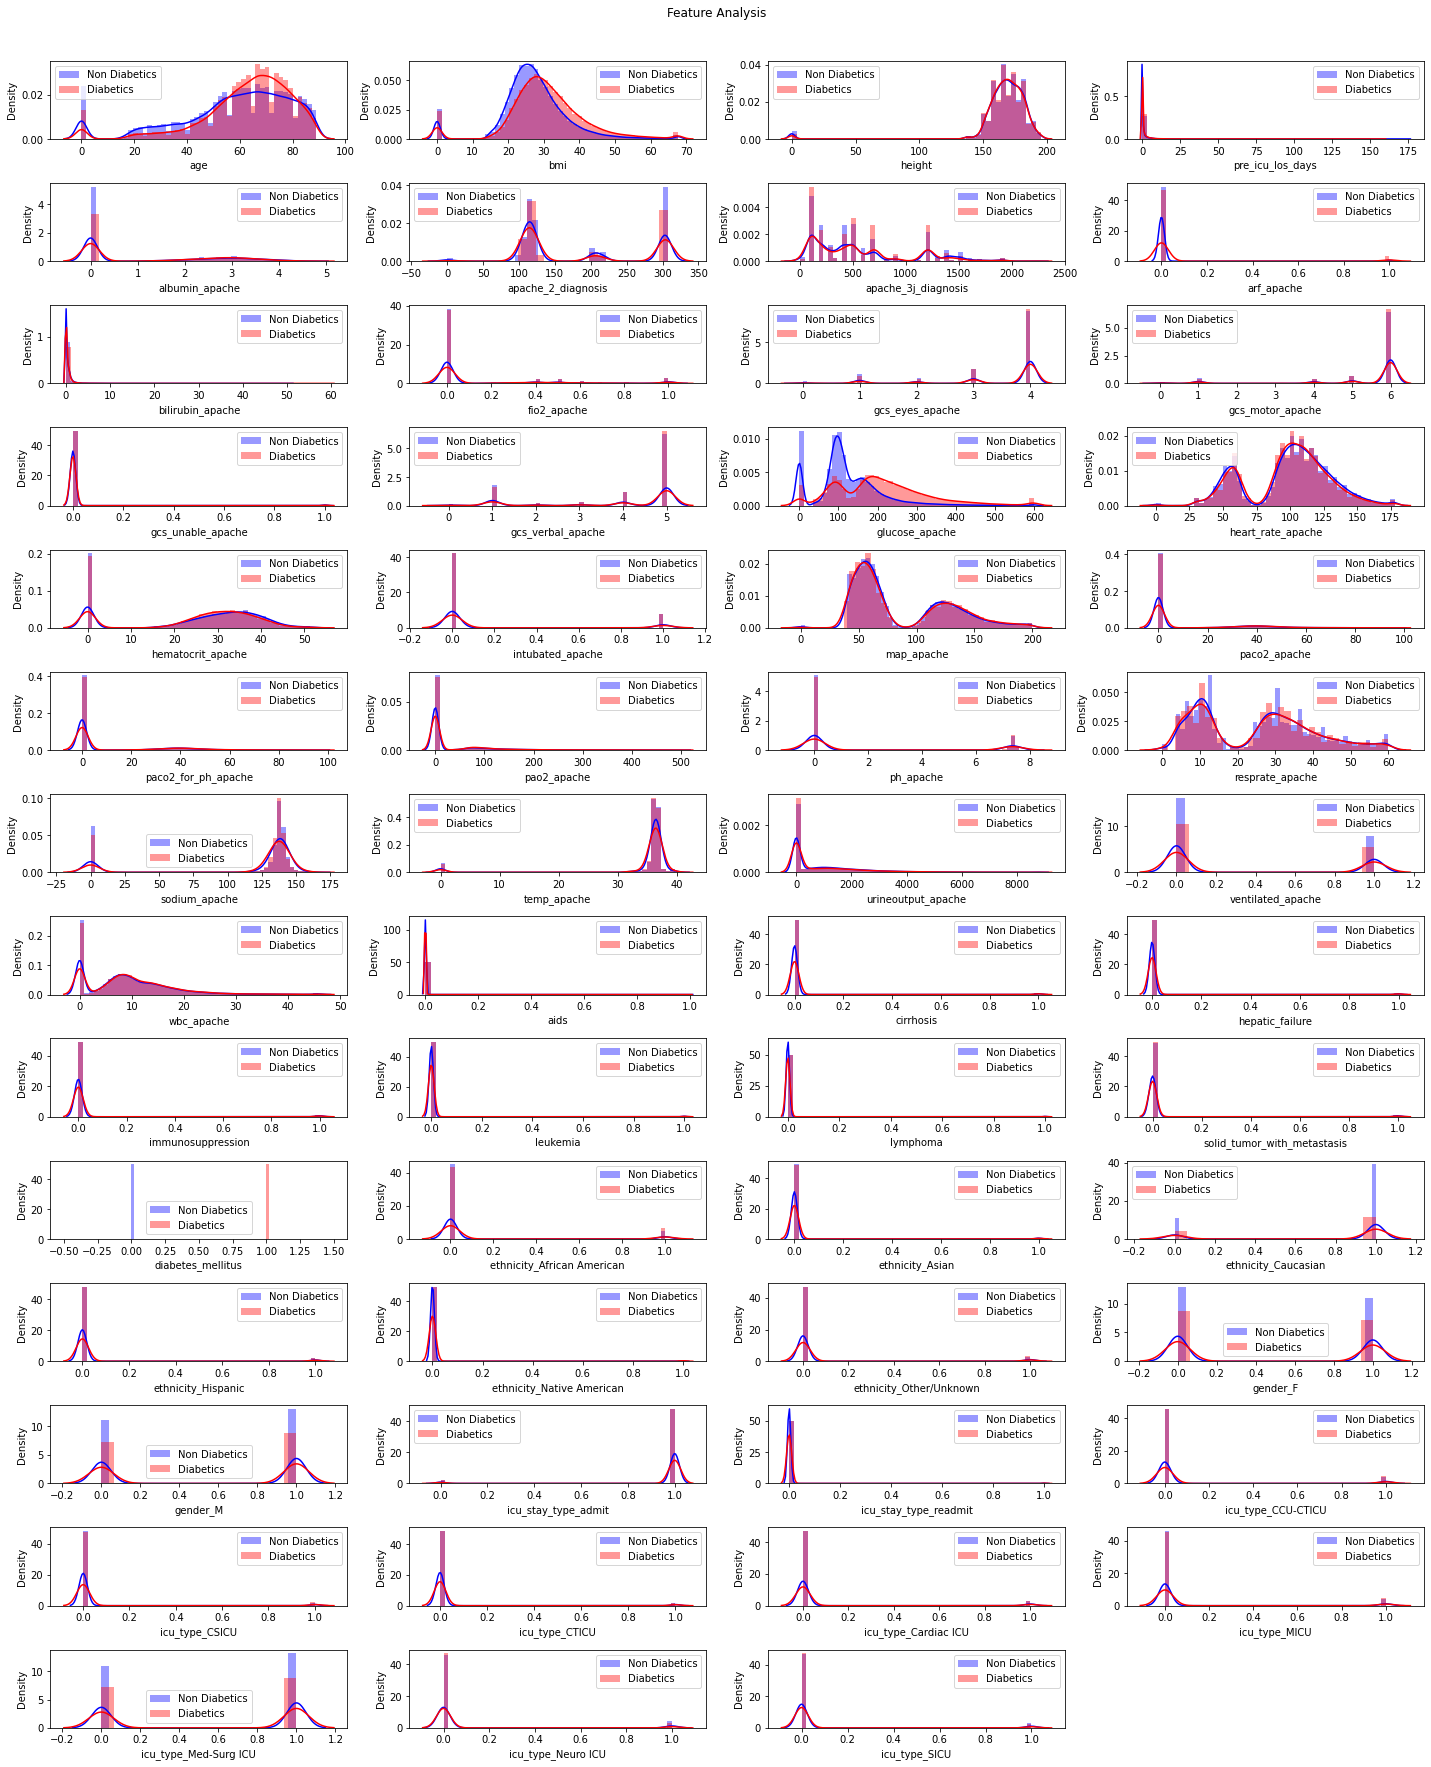

In [436]:
import seaborn as sns
# Next, to analyze composition of each cluster
# Non diabetes
result = training_data_2
# [total_dat['diabetes_mellitus'] == 0]

fig = plt.figure(figsize = (20, 25))
j = 0
for i,item in enumerate(result.columns):
    if i != 10 and i!=9:
        plt.subplot(len(training_data_2.columns)/4,4,  j+1)
        j += 1
        try:
            sns.distplot(result[item][result['diabetes_mellitus']==0], color='b', label = 'Non Diabetics')
            sns.distplot(result[item][result['diabetes_mellitus']==1], color='r', label = 'Diabetics')

        except:  
            sns.countplot(data=result, x = item,hue = "None")
            print(i,item,"Single Value")
            continue
        plt.legend(loc='best')
fig.suptitle('Feature Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

Define X and y, split train and test

In [403]:
y = training_data_2['diabetes_mellitus']
X = training_data_2.loc[:, training_data_2.columns != 'diabetes_mellitus']

In [404]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Random Forest Fit

In [405]:
from sklearn.ensemble import RandomForestClassifier
# random forest classification default: n = 100, criterion='gini'(gini index for feature importance),max_depth = None
RF = RandomForestClassifier( random_state=42)
RF.fit(X_train.iloc[:,:], y_train)
trainresult_RF = RF.predict(X_train.iloc[:,:])
pred_RF = RF.predict(X_test.iloc[:,:])

In [406]:
RF_result = {'encounter_id': X_test.iloc[:,0], 'Result': pred_RF}
RF_result = pd.DataFrame(RF_result)
print(RF_result)

        encounter_id  Result
64153            0.0       0
120206          29.0       0
77218           72.0       0
127944           0.0       0
16400           81.0       0
...              ...     ...
76866           38.0       0
109335          66.0       0
35413           76.0       1
50303           23.0       0
66667           52.0       1

[26019 rows x 2 columns]


In [407]:
# Evaluating Logistic Regression
from sklearn.metrics import confusion_matrix, accuracy_score,f1_score,precision_score,recall_score
print(f'Training Accuracy = {accuracy_score(y_train, trainresult_RF)}')
print(f'Testing Accuracy = {accuracy_score(y_test, pred_RF)}')
print(f'F1 = {f1_score(y_test, pred_RF)}')
print(f'Precision = {precision_score(y_test,pred_RF)}')
print(f'Recall = {recall_score(y_test, pred_RF)}')
# Display the confusion matrix
print('Confusion matrix =')
print(confusion_matrix(y_test,pred_RF))

Training Accuracy = 0.9999903912675839
Testing Accuracy = 0.8179407356162804
F1 = 0.4350626118067979
Precision = 0.6554078332734459
Recall = 0.3255980007140307
Confusion matrix =
[[19458   959]
 [ 3778  1824]]


We get pretty good accuracy from the model. However, it seems that the model is biased toward classifying patients to have no diabetes. This makes sense because we have more non-diabetic patients than diabetic patients. Let's see what will happen if we balance the dataset. 

In [408]:
len(y_train[y_train == 0])
len(y_train[y_train == 1])
X_train['y'] = y_train
balance_X = X_train[X_train['y'] == 0].sample(n = len(X_train[X_train['y'] == 1]))
balance_X = [balance_X, X_train[X_train['y'] == 1]]
balance_X = pd.concat(balance_X)
balance_X

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,age,bmi,height,pre_icu_los_days,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,ethnicity_African American,ethnicity_Asian,ethnicity_Caucasian,ethnicity_Hispanic,ethnicity_Native American,ethnicity_Other/Unknown,gender_F,gender_M,icu_stay_type_admit,icu_stay_type_readmit,icu_type_CCU-CTICU,icu_type_CSICU,icu_type_CTICU,icu_type_Cardiac ICU,icu_type_MICU,icu_type_Med-Surg ICU,icu_type_Neuro ICU,icu_type_SICU,y
109116,56.0,31.000918,165.0,0.172222,1.2,113.0,501.05,1,0.9,15.0,3.39,0.49,3.0,5.0,0.0,2.0,56.0,119.0,24.5,0,49.0,28.0,28.0,31.0,7.300,27.0,139.0,34.10,0.0000,0,27.70,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0
1745,88.0,18.982190,182.9,0.000000,0.0,113.0,502.01,0,0.0,62.0,2.21,0.00,3.0,6.0,0.0,4.0,39.0,42.0,25.4,0,52.0,0.0,0.0,0.0,0.000,25.0,137.0,36.70,0.0000,0,7.80,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0
53471,78.0,18.961450,183.0,0.252083,2.7,106.0,212.01,0,0.7,19.0,1.01,0.00,4.0,6.0,0.0,4.0,165.0,126.0,40.7,0,42.0,0.0,0.0,0.0,0.000,32.0,139.0,36.60,38.8800,1,29.70,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0
121506,78.0,22.160665,152.0,0.493056,2.4,113.0,501.04,0,0.4,42.0,1.67,0.70,1.0,1.0,0.0,1.0,496.0,143.0,16.2,1,40.0,27.0,27.0,89.0,7.060,30.0,137.0,36.80,5816.3616,1,45.80,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0
102088,82.0,27.172065,175.3,7.175694,2.2,108.0,203.01,1,0.8,25.0,4.51,0.30,2.0,5.0,0.0,2.0,79.0,129.0,28.5,1,131.0,32.1,32.1,48.0,7.489,25.0,135.0,36.10,0.0000,1,4.20,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5311,58.0,36.045563,162.6,1.329167,2.9,110.0,104.01,0,0.9,47.0,1.54,0.00,4.0,6.0,0.0,5.0,119.0,127.0,38.5,0,59.0,0.0,0.0,0.0,0.000,31.0,134.0,35.80,0.0000,0,10.70,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1
121637,59.0,28.405504,178.0,0.667361,0.0,301.0,410.01,1,0.0,19.0,7.23,0.00,4.0,6.0,0.0,5.0,176.0,97.0,0.0,0,51.0,0.0,0.0,0.0,0.000,25.0,133.0,36.90,132.7968,0,0.00,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1
62955,48.0,15.109261,155.0,0.195139,0.0,123.0,702.01,0,0.0,13.0,0.73,0.00,4.0,6.0,0.0,5.0,227.0,108.0,32.2,0,47.0,0.0,0.0,0.0,0.000,32.0,140.0,36.72,0.0000,0,9.94,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1
37194,63.0,38.806661,162.6,0.829167,0.0,305.0,901.03,0,0.0,77.0,7.36,0.00,3.0,5.0,0.0,4.0,198.0,98.0,27.8,0,56.0,0.0,0.0,0.0,0.000,50.0,130.0,35.80,0.0000,0,6.40,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1


In [409]:
# Shuffle all rows in balance_x
balance_X = balance_X.sample(frac=1)
balance_X

,age,bmi,height,pre_icu_los_days,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,ethnicity_African American,ethnicity_Asian,ethnicity_Caucasian,ethnicity_Hispanic,ethnicity_Native American,ethnicity_Other/Unknown,gender_F,gender_M,icu_stay_type_admit,icu_stay_type_readmit,icu_type_CCU-CTICU,icu_type_CSICU,icu_type_CTICU,icu_type_Cardiac ICU,icu_type_MICU,icu_type_Med-Surg ICU,icu_type_Neuro ICU,icu_type_SICU,y
14445,23.0,17.382812,160.0,0.302778,0.0,109.0,108.01,0,0.0,0.0,0.00,0.0,4.0,6.0,0.0,5.0,0.0,113.0,0.0,0,0.0,0.0,0.0,0.0,0.000,18.0,0.0,38.3,0.0000,0,0.00,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0
91482,68.0,24.610253,177.8,6.354861,2.0,302.0,109.08,0,0.0,28.0,1.40,0.0,4.0,6.0,0.0,5.0,195.0,132.0,16.2,0,55.0,0.0,0.0,0.0,0.000,33.0,136.0,36.4,0.0000,0,7.58,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1
65881,47.0,0.000000,0.0,0.016667,0.0,123.0,702.01,0,0.0,0.0,0.00,0.0,4.0,6.0,0.0,5.0,598.7,116.0,0.0,0,115.0,0.0,0.0,0.0,0.000,11.0,126.0,35.8,248.2272,0,0.00,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1
99092,43.0,38.092173,167.6,0.490278,0.0,308.0,1207.01,0,0.0,15.0,1.13,0.0,4.0,6.0,0.0,5.0,250.0,109.0,19.4,0,50.0,0.0,0.0,0.0,0.000,5.0,141.0,38.9,0.0000,1,5.30,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1
25140,27.0,45.638980,152.4,0.590278,1.6,113.0,501.05,0,0.6,9.0,0.80,0.0,2.0,5.0,0.0,1.0,93.0,155.0,24.0,0,43.0,0.0,0.0,0.0,0.000,48.0,139.0,36.0,0.0000,1,15.70,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73496,35.0,29.349171,165.1,0.031944,0.0,122.0,703.03,0,0.0,11.0,0.38,0.3,1.0,1.0,0.0,1.0,217.0,104.0,0.0,1,123.0,40.0,40.0,147.0,7.350,45.0,143.0,35.7,0.0000,1,0.00,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1
93048,50.0,67.814990,137.2,0.275694,3.8,305.0,901.04,0,0.0,16.0,0.75,0.0,4.0,6.0,0.0,5.0,206.0,103.0,37.9,0,134.0,0.0,0.0,0.0,0.000,12.0,140.0,36.7,929.4912,0,9.70,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1
96707,27.0,25.545160,149.9,1.079861,1.7,302.0,903.01,0,1.2,5.0,0.40,0.0,4.0,6.0,0.0,5.0,112.0,126.0,27.9,0,127.0,0.0,0.0,0.0,0.000,29.0,144.0,36.6,0.0000,0,26.30,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0
25390,57.0,22.343516,177.0,0.027778,3.1,122.0,703.03,0,0.2,17.0,0.30,0.0,1.0,1.0,0.0,1.0,221.0,141.0,29.8,0,166.0,0.0,0.0,0.0,0.000,4.0,148.0,33.8,0.0000,1,5.30,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0


In [410]:
balance_y = balance_X['y']
balance_X = balance_X.drop(columns='y')

In [411]:
print('Number of diabetic: ', sum(balance_y))
print('Number of non-diabetic: ', len(balance_y)-sum(balance_y))

Number of diabetic:  22544
Number of non-diabetic:  22544


Random Forest Fit

In [412]:
from sklearn.ensemble import RandomForestClassifier
# random forest classification default: n = 100, criterion='gini'(gini index for feature importance),max_depth = None
RF = RandomForestClassifier( random_state=42)
RF.fit(balance_X.iloc[:,:], balance_y)
trainresult_RF = RF.predict(balance_X.iloc[:,:])
pred_RF = RF.predict(X_test.iloc[:,:])

In [413]:
RF_result = {'encounter_id': X_test.iloc[:,0], 'Result': pred_RF}
RF_result = pd.DataFrame(RF_result)
print(RF_result)

        encounter_id  Result
64153            0.0       0
120206          29.0       0
77218           72.0       0
127944           0.0       1
16400           81.0       1
...              ...     ...
76866           38.0       0
109335          66.0       0
35413           76.0       1
50303           23.0       0
66667           52.0       1

[26019 rows x 2 columns]


In [414]:
print(len(y_test[y_test==1]), len(y_test[y_test==0]))

5602 20417


In [415]:
# Evaluating Logistic Regression
from sklearn.metrics import confusion_matrix, accuracy_score,f1_score,precision_score,recall_score
print(f'Training Accuracy = {accuracy_score(balance_y, trainresult_RF)}')
print(f'Testing Accuracy = {accuracy_score(y_test, pred_RF)}')
print(f'F1 = {f1_score(y_test, pred_RF)}')
print(f'Precision = {precision_score(y_test,pred_RF)}')
print(f'Recall = {recall_score(y_test, pred_RF)}')
# Display the confusion matrix
print('Confusion matrix =')
print(confusion_matrix(y_test,pred_RF))

Training Accuracy = 1.0
Testing Accuracy = 0.7505668934240363
F1 = 0.5626684636118598
Precision = 0.45193764884174065
Recall = 0.7452695465905034
Confusion matrix =
[[15354  5063]
 [ 1427  4175]]


After balancing the data, although we still have a lot of misclassifications, the clasification on diabetic data improved.  

Feature Importance

In [416]:
RF_feaimp = RF.feature_importances_
feature_num = list(range(0,len(RF_feaimp)))
feature_name = list(balance_X.columns)
feature_name = feature_name[:]
feature_imp = pd.DataFrame({'num': feature_num, 'name':feature_name,'imp' : abs(RF_feaimp)})
print(feature_imp.sort_values(by='imp', ascending = False))

    num                         name       imp
16   16               glucose_apache  0.195017
1     1                          bmi  0.070467
0     0                          age  0.051463
10   10            creatinine_apache  0.043220
17   17            heart_rate_apache  0.040948
3     3             pre_icu_los_days  0.040641
9     9                   bun_apache  0.039932
6     6          apache_3j_diagnosis  0.038936
20   20                   map_apache  0.037009
18   18            hematocrit_apache  0.035262
25   25              resprate_apache  0.034682
2     2                       height  0.033949
5     5           apache_2_diagnosis  0.033770
30   30                   wbc_apache  0.033376
27   27                  temp_apache  0.031841
26   26                sodium_apache  0.026433
28   28           urineoutput_apache  0.025769
8     8             bilirubin_apache  0.017536
4     4               albumin_apache  0.016670
23   23                  pao2_apache  0.010522
24   24      

From the above information, we can clearly see that the top features to predict diabete is related to glucose level, which makes a lot of sense. 

In [417]:
feature_numbers = balance_X.iloc[:,:].shape[1]

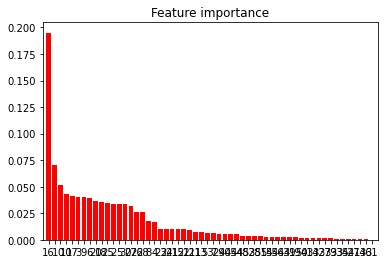

In [418]:
# Plot the impurity-based feature importances of the forest

indices_RF = np.argsort(RF.feature_importances_)[::-1]
plt.figure()
plt.title("Feature importance")
plt.bar(range(feature_numbers), RF.feature_importances_[indices_RF],
        color="r",  align="center")
plt.xticks(range(balance_X.shape[1]), indices_RF)
plt.xlim([-1, balance_X.shape[1]])
plt.show()

Although it is very hard to see the features in this graph because there are so many, we can clearly see that there is a sharp drop of feature importance in this graph. Let's restrict the feature importance to just a few and check the graph again. 

[16  1  0 10 17  3  9  6 20 18 25  2  5 30 27 26 28  8  4 23 24 21 15 22
 12 11 13 53  7 29 40 45 44 48 52 38 51 54 55 46 43 49 19 50 41 34 32 37
 39 33 35 42 47 14 36 31]
[16  1  0 10 17  3  9  6 20 18 25  2  5 30 27 26 28  8  4 23 24 21 15 22
 12 11 13 53  7 29]
[0.19501749 0.07046707 0.05146321 0.04322012 0.04094781 0.04064125
 0.03993225 0.03893563 0.03700924 0.03526239 0.03468199 0.03394863
 0.03377044 0.03337636 0.03184143 0.02643271 0.0257693  0.01753586
 0.01667019 0.01052182 0.01029197 0.01007117 0.01003697 0.00973407
 0.00878558 0.00759646 0.00758843 0.00622261 0.00616504 0.00565227]


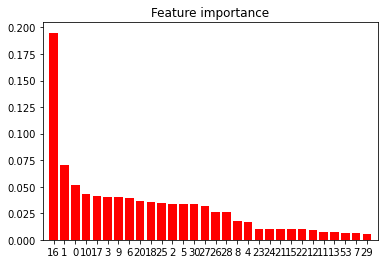

In [419]:
indices_RF = np.argsort(RF.feature_importances_)[::-1]
print(indices_RF)
indices_RF = indices_RF[0:30]
print(indices_RF)
print(RF.feature_importances_[indices_RF])
plt.figure()
plt.title("Feature importance")
plt.bar(range(len(indices_RF)), RF.feature_importances_[indices_RF],
        color="r",  align="center")
plt.xticks(range(len(indices_RF)), indices_RF)
plt.xlim([-1, len(indices_RF)])
plt.show()

In [420]:
print(feature_imp.iloc[indices_RF,])

    num                   name       imp
16   16         glucose_apache  0.195017
1     1                    bmi  0.070467
0     0                    age  0.051463
10   10      creatinine_apache  0.043220
17   17      heart_rate_apache  0.040948
3     3       pre_icu_los_days  0.040641
9     9             bun_apache  0.039932
6     6    apache_3j_diagnosis  0.038936
20   20             map_apache  0.037009
18   18      hematocrit_apache  0.035262
25   25        resprate_apache  0.034682
2     2                 height  0.033949
5     5     apache_2_diagnosis  0.033770
30   30             wbc_apache  0.033376
27   27            temp_apache  0.031841
26   26          sodium_apache  0.026433
28   28     urineoutput_apache  0.025769
8     8       bilirubin_apache  0.017536
4     4         albumin_apache  0.016670
23   23            pao2_apache  0.010522
24   24              ph_apache  0.010292
21   21           paco2_apache  0.010071
15   15      gcs_verbal_apache  0.010037
22   22    paco2

The above graph and list show that glucose apache (The glucose concentration measured during the first 24 hours which results in the highest APACHE III score),  BMI, and age are having distinguishly higher feature importance than others. This makes sense because diabete is mostly reflected in patient's glucose level, and that BMI and age are also a good indicator of whether patient has diabete or not. However, the feature importance of BMI and age are clearly lower than glucose apache, because those who have diabete are not gaurantee to have high BMI and those who have diabete are not necessary elderly (younger people can also have diabete). 

Reduce features to only 3: BMI , age, and glucose apache

In [421]:
X = X[['bmi', 'glucose_apache', 'age']]

In [422]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [423]:
print(len(y_test[y_test==1]), len(y_test[y_test==0]))

5602 20417


balance training data

In [424]:
X_train['y'] = y_train
balance_X = X_train[X_train['y'] == 0].sample(n = len(X_train[X_train['y'] == 1]))
balance_X = [balance_X, X_train[X_train['y'] == 1]]
balance_X = pd.concat(balance_X)
balance_X

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,bmi,glucose_apache,age,y
109838,23.114187,93.0,89.0,0
12454,25.615845,115.0,84.0,0
53205,27.100491,0.0,79.0,0
106845,25.280110,122.0,20.0,0
71165,33.540184,83.0,47.0,0
...,...,...,...,...
5311,36.045563,119.0,58.0,1
121637,28.405504,176.0,59.0,1
62955,15.109261,227.0,48.0,1
37194,38.806661,198.0,63.0,1


In [425]:
balance_y = balance_X['y']
balance_X = balance_X.drop(columns='y')

In [426]:
print('Number of diabetic: ', sum(balance_y))
print('Number of non-diabetic: ', len(balance_y)-sum(balance_y))

Number of diabetic:  22544
Number of non-diabetic:  22544


Random Forest Fit

In [427]:
from sklearn.ensemble import RandomForestClassifier
# random forest classification default: n = 100, criterion='gini'(gini index for feature importance),max_depth = None
RF = RandomForestClassifier( random_state=42)
RF.fit(balance_X.iloc[:,:], balance_y)
trainresult_RF = RF.predict(balance_X.iloc[:,:])
pred_RF = RF.predict(X_test.iloc[:,:])

In [428]:
RF_result = {'encounter_id': X_test.iloc[:,0], 'Result': pred_RF}
RF_result = pd.DataFrame(RF_result)
print(RF_result)

        encounter_id  Result
64153      25.761694       0
120206     25.759637       0
77218      21.380336       1
127944     27.138158       1
16400      34.008352       1
...              ...     ...
76866      20.648094       0
109335     33.022600       1
35413      30.312500       1
50303      18.342800       0
66667      36.328125       1

[26019 rows x 2 columns]


In [429]:
# Evaluating Logistic Regression
from sklearn.metrics import confusion_matrix, accuracy_score,f1_score,precision_score,recall_score
print(f'Training Accuracy = {accuracy_score(balance_y, trainresult_RF)}')
print(f'Testing Accuracy = {accuracy_score(y_test, pred_RF)}')
print(f'F1 = {f1_score(y_test, pred_RF)}')
print(f'Precision = {precision_score(y_test,pred_RF)}')
print(f'Recall = {recall_score(y_test, pred_RF)}')
# Display the confusion matrix
print('Confusion matrix =')
print(confusion_matrix(y_test,pred_RF))

Training Accuracy = 0.998624911284599
Testing Accuracy = 0.6850378569506899
F1 = 0.4918459725925467
Precision = 0.3768171021377672
Recall = 0.7079614423420207
Confusion matrix =
[[13858  6559]
 [ 1636  3966]]


Graph results

In [431]:
total_dat = training_data_2[['bmi', 'glucose_apache', 'age', 'diabetes_mellitus']]
total_dat

,bmi,glucose_apache,age,diabetes_mellitus
0,22.732803,168.0,68.0,1
1,27.421875,145.0,77.0,1
2,31.952749,0.0,25.0,0
3,22.635548,185.0,81.0,0
4,0.000000,0.0,19.0,0
...,...,...,...,...
130086,29.287256,0.0,50.0,0
130087,29.653433,139.0,79.0,0
130088,32.265371,346.0,73.0,1
130089,24.408579,137.0,81.0,0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

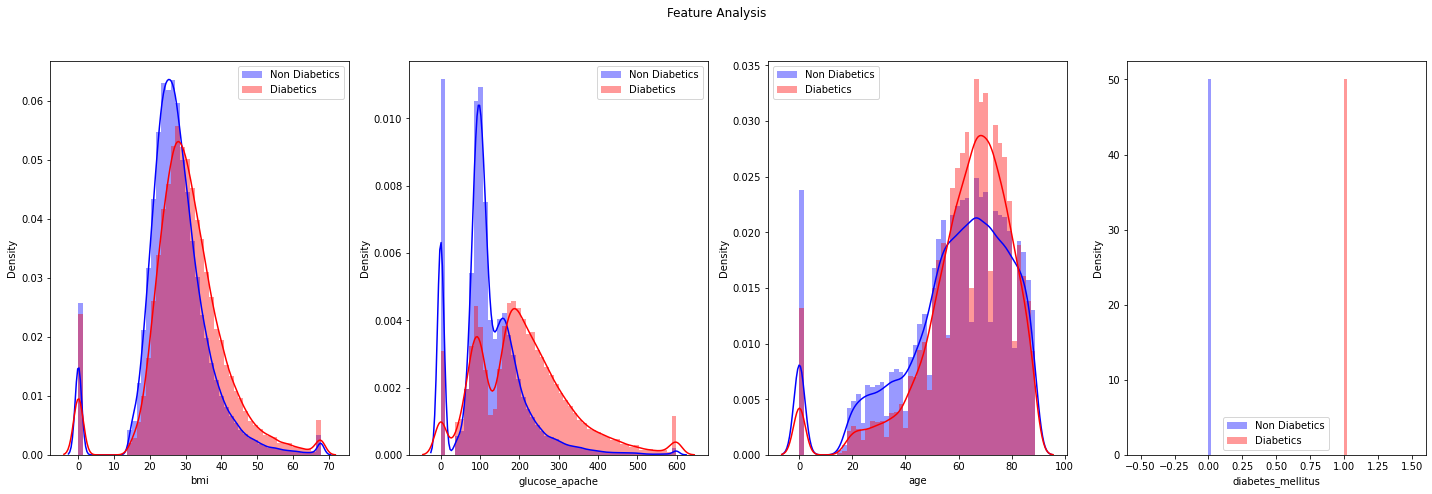

In [432]:
import seaborn as sns
# Next, to analyze composition of each cluster
# Non diabetes
result = total_dat
# [total_dat['diabetes_mellitus'] == 0]

fig = plt.figure(figsize = (20, 25))
j = 0
for i,item in enumerate(result.columns):
    if i != 10 and i!=9:
        plt.subplot(4, 4, j+1)
        j += 1
        try:
            sns.distplot(result[item][result['diabetes_mellitus']==0], color='b', label = 'Non Diabetics')
            sns.distplot(result[item][result['diabetes_mellitus']==1], color='r', label = 'Diabetics')

        except:  
            sns.countplot(data=result, x = item,hue = "None")
            print(i,item,"Single Value")
            continue
        plt.legend(loc='best')
fig.suptitle('Feature Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

# Let try logistic regression and see what happens

In [437]:
y = training_data_2['diabetes_mellitus']
X = training_data_2.loc[:, training_data_2.columns != 'diabetes_mellitus']

In [438]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)



In [439]:
X_train['y'] = y_train
balance_X = X_train[X_train['y'] == 0].sample(n = len(X_train[X_train['y'] == 1]))
balance_X = [balance_X, X_train[X_train['y'] == 1]]
balance_X = pd.concat(balance_X)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [440]:
balance_y = balance_X['y']
balance_X = balance_X.drop(columns='y')

In [441]:
print('Number of diabetic: ', sum(balance_y))
print('Number of non-diabetic: ', len(balance_y)-sum(balance_y))

Number of diabetic:  21124
Number of non-diabetic:  21124


Add normalize data to pipeline

In [442]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
pipe = make_pipeline(StandardScaler(), LogisticRegression())
log_reg = pipe.fit(balance_X, balance_y)  # apply scaling on training data
# pipe.score(X_test, y_test)  # apply scaling on testing data, without leaking training data.

In [443]:
trainresult_logreg = log_reg.predict(balance_X)
pred_logreg = log_reg.predict(X_test)

In [444]:
LG_result = {'Result': pred_logreg}
LG_result = pd.DataFrame(LG_result)
print(LG_result)

       Result
0           0
1           0
2           0
3           1
4           0
...       ...
32518       0
32519       0
32520       1
32521       0
32522       0

[32523 rows x 1 columns]


In [445]:
print(len(y_test[y_test==1]), len(y_test[y_test==0]))

7022 25501


In [449]:
# Evaluating Logistic Regression
from sklearn.metrics import confusion_matrix, accuracy_score,f1_score,precision_score,recall_score, r2_score
print(f'Training Accuracy = {accuracy_score(balance_y, trainresult_logreg)}')
print(f'Testing Accuracy = {accuracy_score(y_test, pred_logreg)}')
print(f'F1 = {f1_score(y_test, pred_logreg)}')
print(f'Precision = {precision_score(y_test,pred_logreg)}')
print(f'Recall = {recall_score(y_test, pred_logreg)}')
# Display the confusion matrix
print('Confusion matrix =')
print(confusion_matrix(y_test,pred_logreg))
RSS = sum((y_test - pred_logreg)**2)
TSS = sum((y_test - (sum(y_test)/len(y_test)))**2)
R_2 = 1-RSS / TSS
print('R squared = ', R_2)

Training Accuracy = 0.7247443665972354
Testing Accuracy = 0.7422132029640562
F1 = 0.537408960494372
Precision = 0.4386597009547829
Recall = 0.6935346055254913
Confusion matrix =
[[19269  6232]
 [ 2152  4870]]
R squared =  -0.5227332549641768


It seems that the logistic regression result is pretty bad. 

In [354]:
# Check each feature's importance by checking their coefficiences
logreg_coef = logreg.coef_[0]
feature_num = list(range(0,len(logreg_coef)))
feature_name = list(balance_X.columns)
feature_coef = pd.DataFrame({'num': feature_num, 'name':feature_name,'coef' : abs(logreg_coef)})
print(feature_coef.sort_values(by='coef', ascending = False))


    num                         name      coef
16   16               glucose_apache  0.922009
1     1                          bmi  0.329501
0     0                          age  0.226905
7     7                   arf_apache  0.199049
9     9                   bun_apache  0.194846
26   26                sodium_apache  0.168608
13   13             gcs_motor_apache  0.103757
8     8             bilirubin_apache  0.103250
30   30                   wbc_apache  0.084869
17   17            heart_rate_apache  0.081170
49   49               icu_type_CSICU  0.076953
2     2                       height  0.073420
11   11                  fio2_apache  0.072663
18   18            hematocrit_apache  0.072507
40   40          ethnicity_Caucasian  0.061737
25   25              resprate_apache  0.058671
54   54           icu_type_Neuro ICU  0.056944
28   28           urineoutput_apache  0.054870
5     5           apache_2_diagnosis  0.053504
12   12              gcs_eyes_apache  0.051951
55   55      

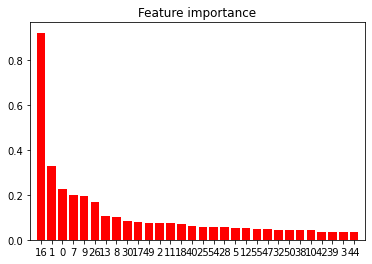

In [355]:
# Plot the impurity-based feature importances of the forest
import matplotlib.pyplot as plt
indices_LG = np.argsort(feature_coef.coef)[::-1]
indices_LG = indices_LG[0:30]
plt.figure()
plt.title("Feature importance")
plt.bar(range(len(indices_LG)), abs(logreg_coef[indices_LG]),
        color="r",  align="center")
plt.xticks(range(len(indices_LG)), indices_LG)
plt.xlim([-1, len(indices_LG)])
plt.show()

In [356]:
print(feature_coef.iloc[indices_LG,])

    num                        name      coef
16   16              glucose_apache  0.922009
1     1                         bmi  0.329501
0     0                         age  0.226905
7     7                  arf_apache  0.199049
9     9                  bun_apache  0.194846
26   26               sodium_apache  0.168608
13   13            gcs_motor_apache  0.103757
8     8            bilirubin_apache  0.103250
30   30                  wbc_apache  0.084869
17   17           heart_rate_apache  0.081170
49   49              icu_type_CSICU  0.076953
2     2                      height  0.073420
11   11                 fio2_apache  0.072663
18   18           hematocrit_apache  0.072507
40   40         ethnicity_Caucasian  0.061737
25   25             resprate_apache  0.058671
54   54          icu_type_Neuro ICU  0.056944
28   28          urineoutput_apache  0.054870
5     5          apache_2_diagnosis  0.053504
12   12             gcs_eyes_apache  0.051951
55   55               icu_type_SIC

In the logistic regression model, it seems that the coefficients of glucose_apache, bmi, age, arf_apache, bun_apache, and sodium_apache are weighted the most in this model. Let's get rid of all the other ones. 

In [357]:
X = X[['bmi', 'glucose_apache', 'age', 'arf_apache', 'bun_apache', 'sodium_apache']]

In [358]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [359]:
print(len(y_test[y_test==1]), len(y_test[y_test==0]))

5602 20417


balance training data

In [360]:
X_train['y'] = y_train
balance_X = X_train[X_train['y'] == 0].sample(n = len(X_train[X_train['y'] == 1]))
balance_X = [balance_X, X_train[X_train['y'] == 1]]
balance_X = pd.concat(balance_X)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [361]:
balance_y = balance_X['y']
balance_X = balance_X.drop(columns='y')

In [362]:
print('Number of diabetic: ', sum(balance_y))
print('Number of non-diabetic: ', len(balance_y)-sum(balance_y))

Number of diabetic:  22544
Number of non-diabetic:  22544


Add normalize data to pipeline

In [363]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
pipe = make_pipeline(StandardScaler(), LogisticRegression())
log_reg = pipe.fit(balance_X, balance_y)  # apply scaling on training data
# pipe.score(X_test, y_test)  # apply scaling on testing data, without leaking training data.

In [364]:
trainresult_logreg = log_reg.predict(balance_X)
pred_logreg = log_reg.predict(X_test)

In [365]:
LG_result = {'Result': pred_logreg}
LG_result = pd.DataFrame(LG_result)
print(LG_result)

       Result
0           0
1           0
2           0
3           0
4           1
...       ...
26014       0
26015       0
26016       1
26017       0
26018       1

[26019 rows x 1 columns]


In [366]:
print(len(y_test[y_test==1]), len(y_test[y_test==0]))

5602 20417


In [367]:
# Evaluating Logistic Regression
from sklearn.metrics import confusion_matrix, accuracy_score,f1_score,precision_score,recall_score, r2_score
print(f'Training Accuracy = {accuracy_score(balance_y, trainresult_logreg)}')
print(f'Testing Accuracy = {accuracy_score(y_test, pred_logreg)}')
print(f'F1 = {f1_score(y_test, pred_logreg)}')
print(f'Precision = {precision_score(y_test,pred_logreg)}')
print(f'Recall = {recall_score(y_test, pred_logreg)}')
# Display the confusion matrix
print('Confusion matrix =')
print(confusion_matrix(y_test,pred_logreg))
print('R squared = ', r2_score(y_test, pred_logreg))

Training Accuracy = 0.7176410574875799
Testing Accuracy = 0.7401898612552366
F1 = 0.5312716682845652
Precision = 0.43435374149659867
Recall = 0.6838629061049625
Confusion matrix =
[[15428  4989]
 [ 1771  3831]]
R squared =  -0.5378085237681871


Scatter plots

In [388]:
tot_dat = training_data_2[['bmi', 'glucose_apache', 'age', 'arf_apache', 'bun_apache', 'sodium_apache', 'diabetes_mellitus']]
i = 1
tot_dat.columns[i]

'glucose_apache'

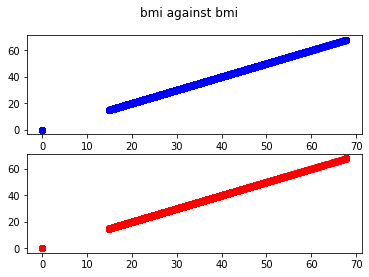

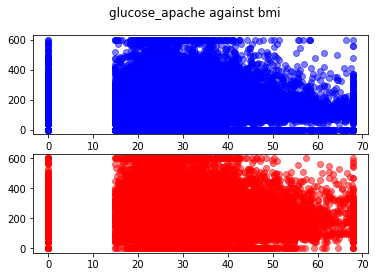

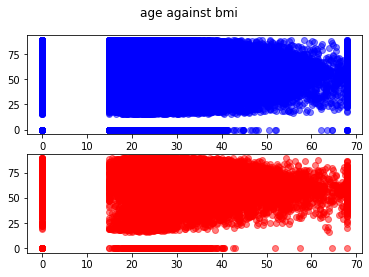

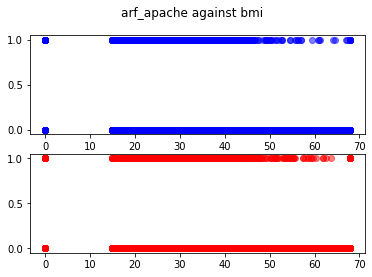

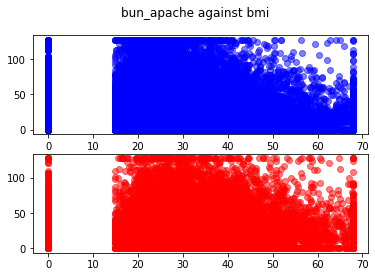

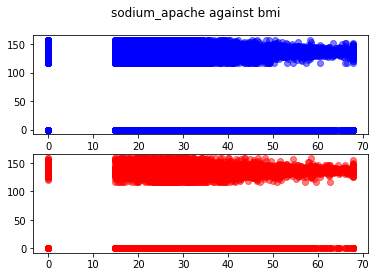

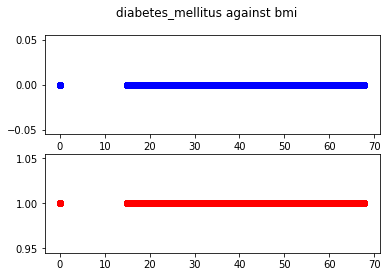

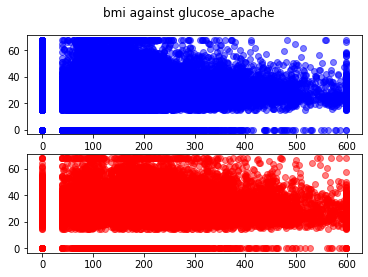

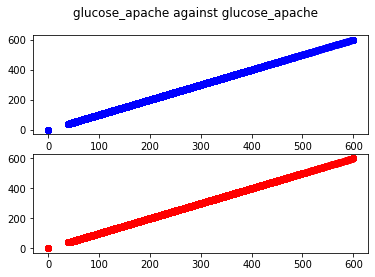

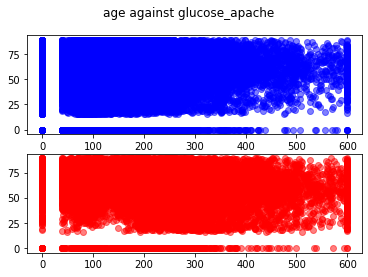

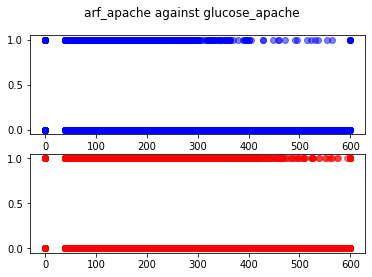

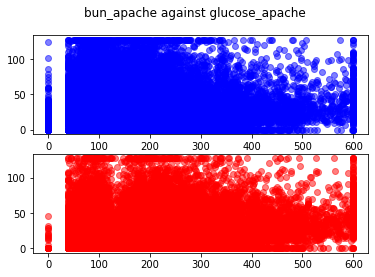

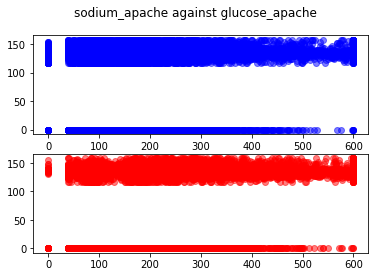

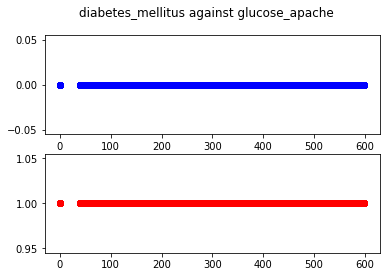

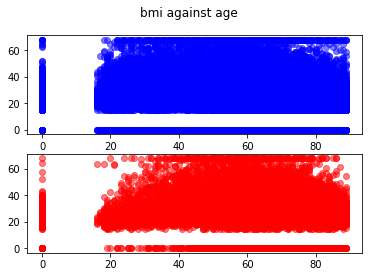

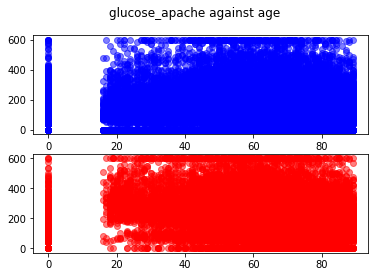

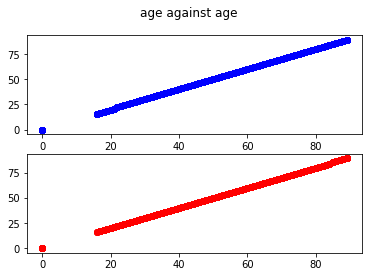

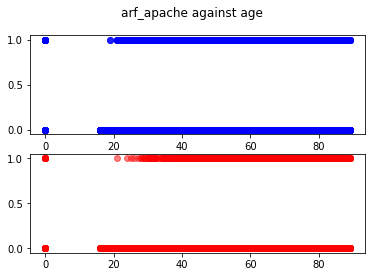

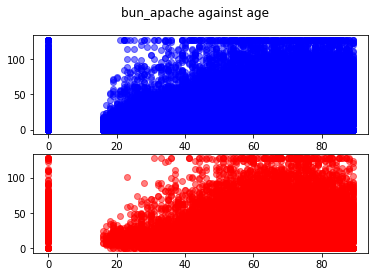

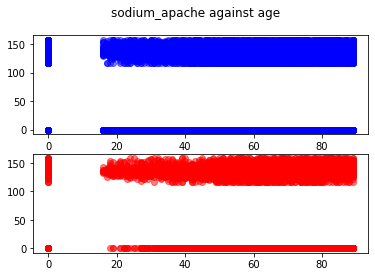

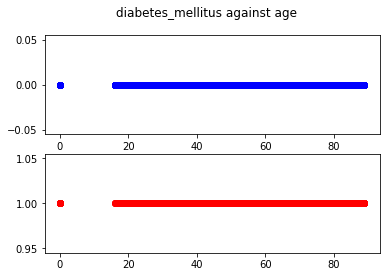

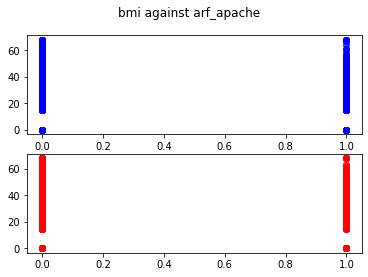

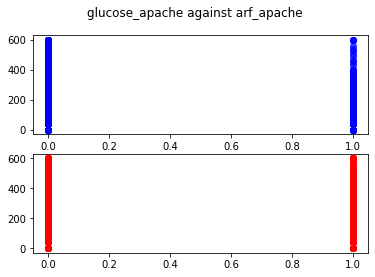

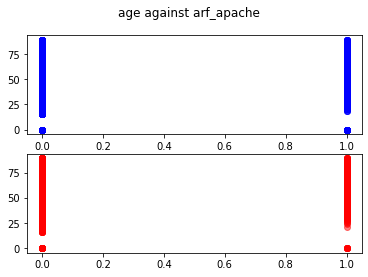

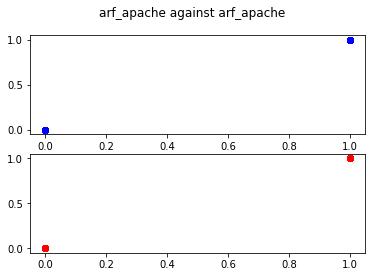

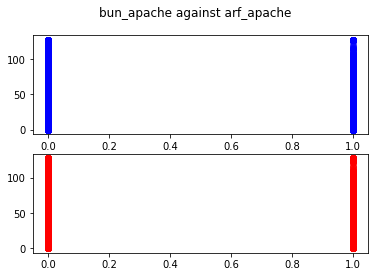

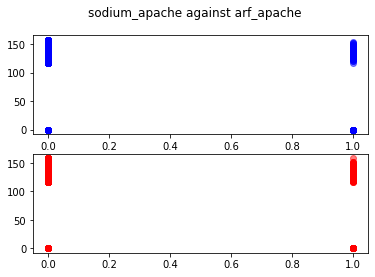

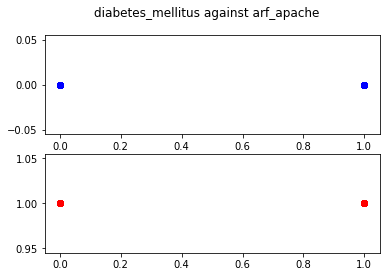

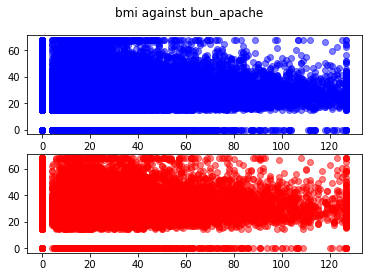

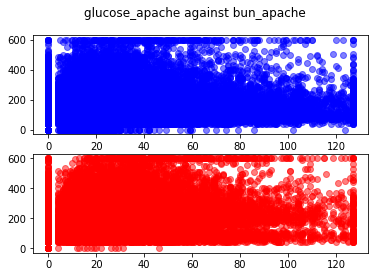

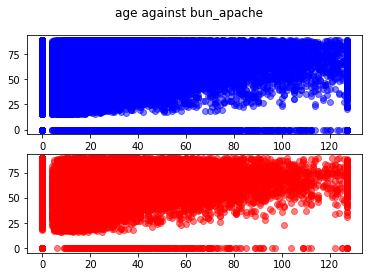

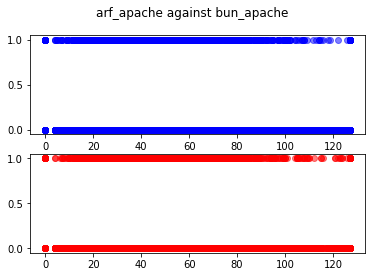

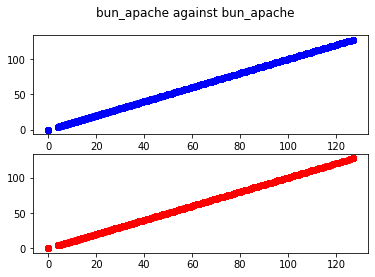

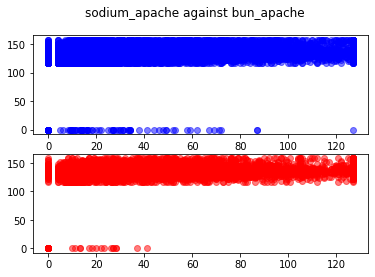

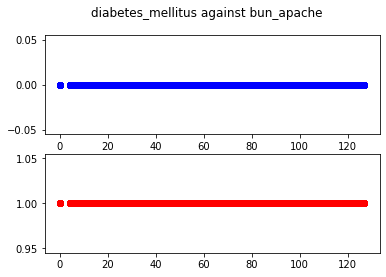

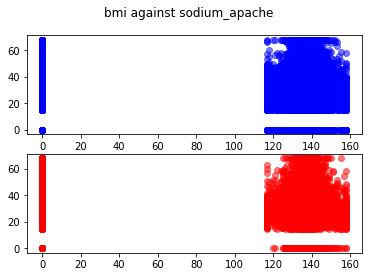

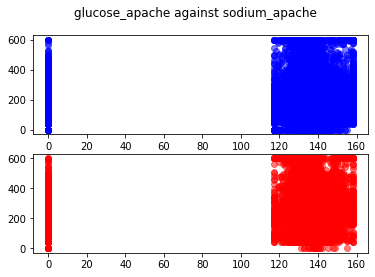

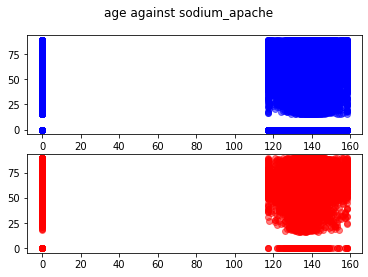

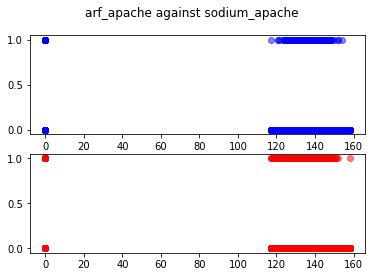

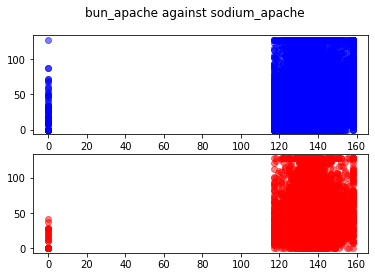

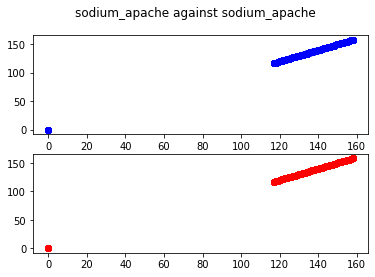

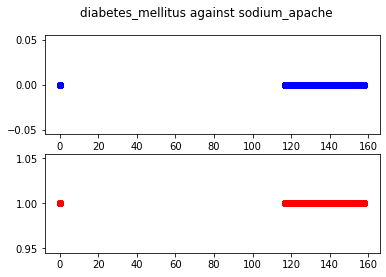

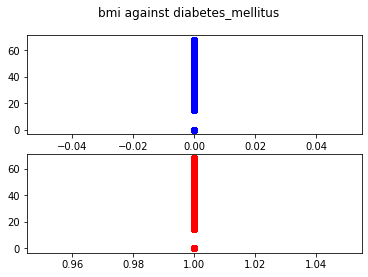

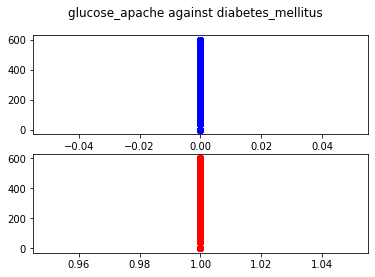

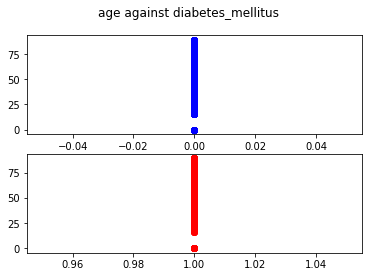

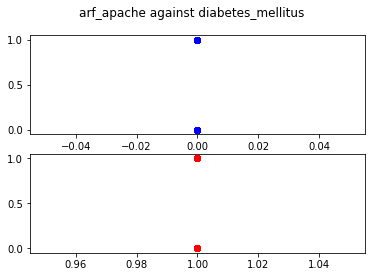

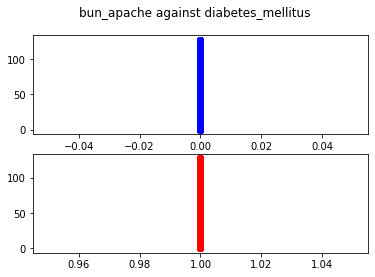

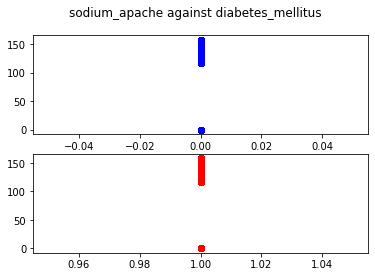

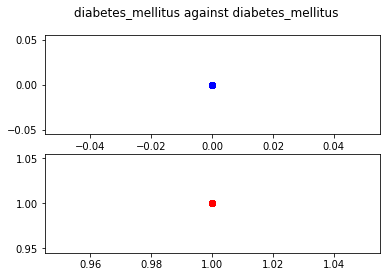

In [391]:

for r in range(0,len(tot_dat.columns)):
  for c in range(0,len(tot_dat.columns)):
    # plt.figure()
    # plt.scatter(tot_dat[tot_dat['diabetes_mellitus'] == 0].iloc[:,r], tot_dat[tot_dat['diabetes_mellitus'] == 0].iloc[:,c],alpha=0.5)
    # plt.scatter(tot_dat[tot_dat['diabetes_mellitus'] == 1].iloc[:,r], tot_dat[tot_dat['diabetes_mellitus'] == 1].iloc[:,c], alpha=0.5)
    title = tot_dat.columns[c] + ' against '+ tot_dat.columns[r]
    # plt.title(title)
    plt.show()
    fig, axs = plt.subplots(2)
    fig.suptitle(title)
    axs[0].scatter(tot_dat[tot_dat['diabetes_mellitus'] == 0].iloc[:,r], tot_dat[tot_dat['diabetes_mellitus'] == 0].iloc[:,c],alpha=0.5,color="blue")
    axs[1].scatter(tot_dat[tot_dat['diabetes_mellitus'] == 1].iloc[:,r], tot_dat[tot_dat['diabetes_mellitus'] == 1].iloc[:,c], alpha=0.5,color="red")
    c +=1
  r+=1

These above graphs show that there is not much linear relationship between each predictors. 